# Lab: Model Validation & Iteration


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
marketing_df = pd.read_csv('marketing_customer_analysis_clean.csv')
marketing_df = marketing_df.drop('unnamed:_0',axis=1)
marketing_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [3]:
marketing_df.rename(columns=lambda name:name.lower().replace(' ','_'), inplace=True)
marketing_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'],
      dtype='object')

In [4]:
# divide df into numerical and categorical dfs
marketing_numerical = marketing_df.select_dtypes(include='number')
marketing_categorical = marketing_df.select_dtypes(include='object')

In [5]:
# apply one hot encoding to nominal values
marketing_nominal = pd.get_dummies(marketing_categorical[['state','employmentstatus','gender','location_code',
                                                          'marital_status','policy_type','policy','renew_offer_type',
                                                          'sales_channel','vehicle_class']],
                                   dtype=int)
marketing_nominal

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
10906,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10908,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [6]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ord_enc = OrdinalEncoder()
oh_enc = OneHotEncoder()

In [7]:
marketing_ordinal = marketing_df[['response', 'coverage', 'education', 'vehicle_size']]
marketing_ordinal.head()

,response,coverage,education,vehicle_size
0,No,Basic,College,Medsize
1,No,Basic,College,Medsize
2,No,Basic,Bachelor,Medsize
3,Yes,Extended,College,Medsize
4,No,Premium,Bachelor,Medsize


In [8]:
# reference code from previous lab
# ordinal data to encode: response, coverage, education, vehicle_size
#response
#coverage_ordinal_map = {'Basic':0, 'Extended':1, 'Premium':2}
#ducation_ordinal_map = {'College':1, 'Bachelor':2, 'High School or Below':0, 'Doctor':4, 'Master':3}
#vehiclesize_ordinal_map = {'Medsize':1, 'Small':0, 'Large':2}


In [9]:
# apply OrdinalEncoder to ordinal df
response_enc = OrdinalEncoder(categories=[['No','Yes']])
marketing_ordinal['response'] = response_enc.fit_transform(marketing_ordinal[['response']])

coverage_enc = OrdinalEncoder(categories=[['Basic','Extended','Premium']])
marketing_ordinal['coverage'] = coverage_enc.fit_transform(marketing_ordinal[["coverage"]])

education_enc = OrdinalEncoder(categories=[['High School or Below','College','Bachelor','Master','Doctor']])
marketing_ordinal['education'] = education_enc.fit_transform(marketing_ordinal[['education']])

vehicle_enc = OrdinalEncoder(categories=[['Small','Medsize','Large']])
marketing_ordinal['vehicle_size'] = vehicle_enc.fit_transform(marketing_ordinal[['vehicle_size']])

marketing_ordinal

/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_79761/1035201458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_ordinal['response'] = response_enc.fit_transform(marketing_ordinal[['response']])
/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_79761/1035201458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_ordinal['coverage'] = coverage_enc.fit_transform(marketing_ordinal[["coverage"]])
/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_79761/1035201

,response,coverage,education,vehicle_size
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,2.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,2.0,2.0,1.0
...,...,...,...,...
10905,0.0,2.0,2.0,1.0
10906,0.0,0.0,1.0,1.0
10907,0.0,1.0,2.0,1.0
10908,0.0,2.0,1.0,1.0


In [10]:
# join the two categorical dfs into one

marketing_categorical = pd.concat([marketing_ordinal, marketing_nominal], axis=1)
marketing_categorical

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.0,0.0,2.0,1.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,1.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0.0,2.0,2.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,2.0,2.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10906,0.0,0.0,1.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10907,0.0,1.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10908,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
# join categorical with numerical

mark_df = pd.concat([marketing_categorical, marketing_numerical], axis=1)
mark_df

# customer and effective_to_date columns not included

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,...,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,0.0,0.0,2.0,1.0,0,0,0,0,1,0,...,0,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,1.0,1.0,1.0,1.0,0,0,0,1,0,0,...,0,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,0.0,2.0,2.0,1.0,0,0,0,1,0,0,...,0,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,2.0,2.0,1.0,0,0,1,0,0,0,...,0,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,0.0,0.0,1.0,1.0,0,0,0,1,0,0,...,0,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,0.0,1.0,2.0,1.0,1,0,0,0,0,0,...,0,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


### X-y split
(y is the target variable, in this case, "total claim amount")

In [12]:
mark_df = mark_df.dropna()
mark_df = mark_df.drop_duplicates()

In [13]:
import matplotlib.pyplot as plt 

In [14]:
X = mark_df.drop('total_claim_amount', axis=1)
y = mark_df[['total_claim_amount']]

## Model 1

### Train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [17]:
X_test

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
3173,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,1,5705.899103,0,74,2.000000,34,0.000000,9,1
10693,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,1,2834.646235,24506,71,7.000000,47,0.000000,1,2
7780,0.0,0.0,1.0,0.0,0,0,1,0,0,0,...,0,0,5573.106050,85704,69,21.000000,84,0.000000,7,2
8135,0.0,0.0,2.0,1.0,0,0,0,1,0,0,...,0,0,8193.555045,54950,103,15.149071,75,0.384256,7,2
3382,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,0,16350.130610,0,165,12.000000,82,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1.0,0.0,0.0,2.0,1,0,0,0,0,0,...,0,1,20096.893370,92766,71,17.000000,15,0.000000,2,1
9022,0.0,0.0,0.0,1.0,0,1,0,0,0,0,...,0,0,5890.528762,76875,73,21.000000,4,0.000000,9,1
6860,0.0,0.0,2.0,1.0,0,1,0,0,0,1,...,0,0,5615.073509,19949,74,0.000000,99,1.000000,3,1
7863,0.0,2.0,0.0,1.0,0,0,1,0,0,0,...,0,0,9500.081670,96276,117,33.000000,81,0.000000,6,1


### Standardize the data

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

array([[<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>],
       [<Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'employmentstatus_Disabled'}>,
        <Axes: title={'center': 'employmentstatus_Employed'}>,
        <Axes: title={'center': 'employmentstatus_Medical Leave'}>],
       [<Axes: title={'center': 'employmentstatus_Retired'}>,
        <Axes: title={'center': 'employmentstatus_Unemployed'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>],
       [<Axes: title={'center': 'location_code_Rural'}>,
        <Axes: title={'center': 'location_code_Suburban'}>,
        <Axes: tit

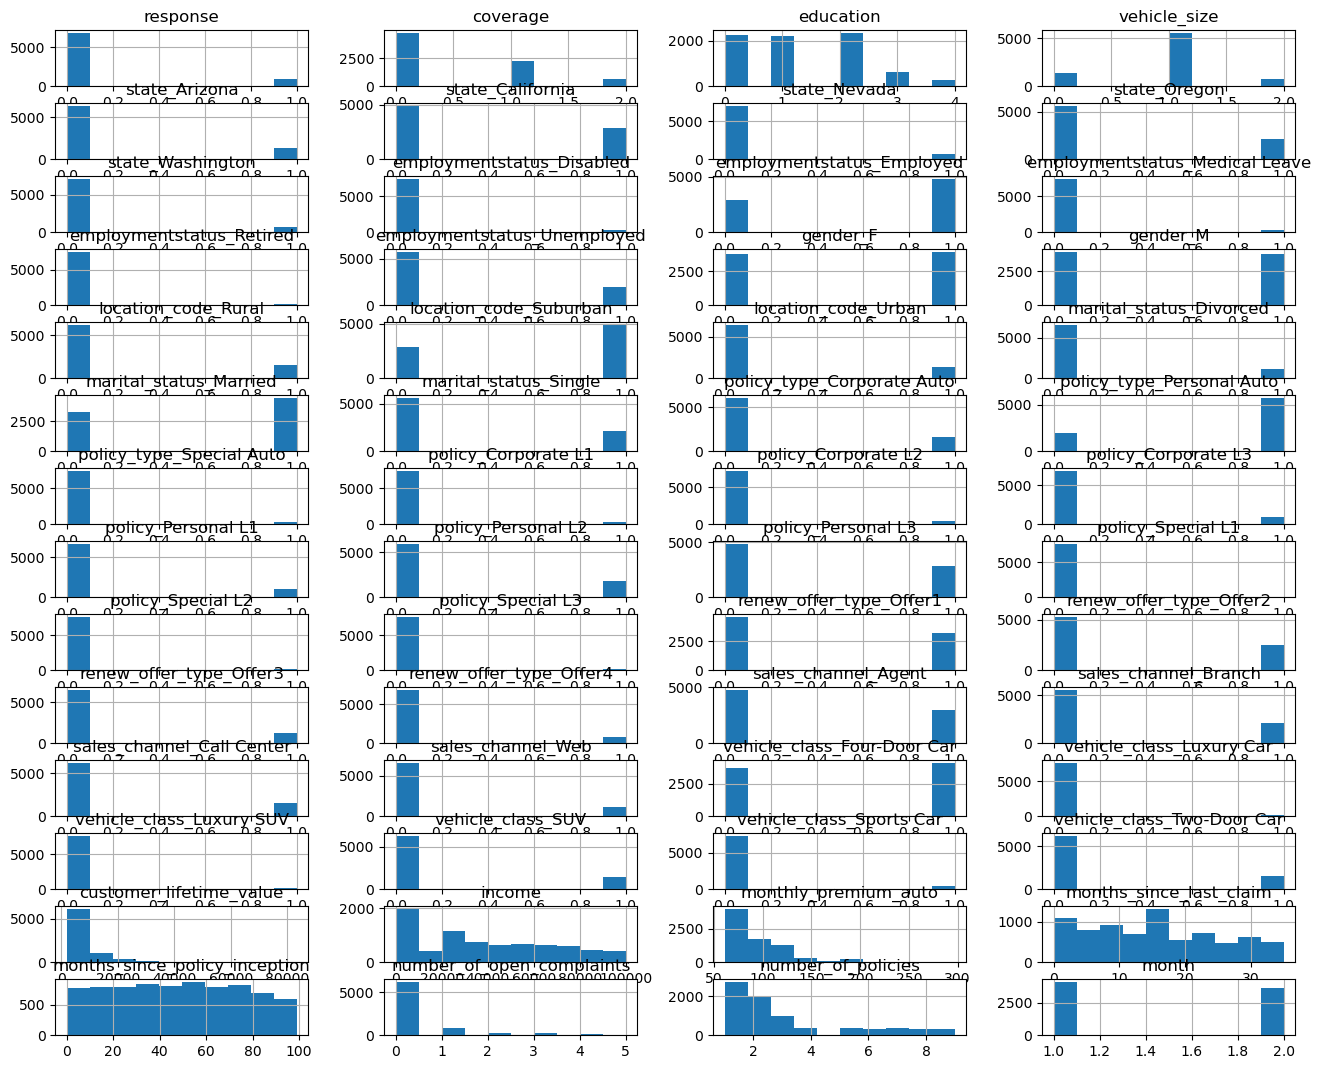

In [19]:
X_train.hist(bins=10, figsize=(16,14), layout=(15,4), sharex=False)
# consider MinMaxScaler for a wide range,
# consider StandardScaler for somewhat bell-shaped distribution
# consider PowerTransformer skewed, non-normal distribution
# ideally apply the same scaler/transformer to all inputs

array([[<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>],
       [<Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'employmentstatus_Disabled'}>,
        <Axes: title={'center': 'employmentstatus_Employed'}>,
        <Axes: title={'center': 'employmentstatus_Medical Leave'}>],
       [<Axes: title={'center': 'employmentstatus_Retired'}>,
        <Axes: title={'center': 'employmentstatus_Unemployed'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>],
       [<Axes: title={'center': 'location_code_Rural'}>,
        <Axes: title={'center': 'location_code_Suburban'}>,
        <Axes: tit

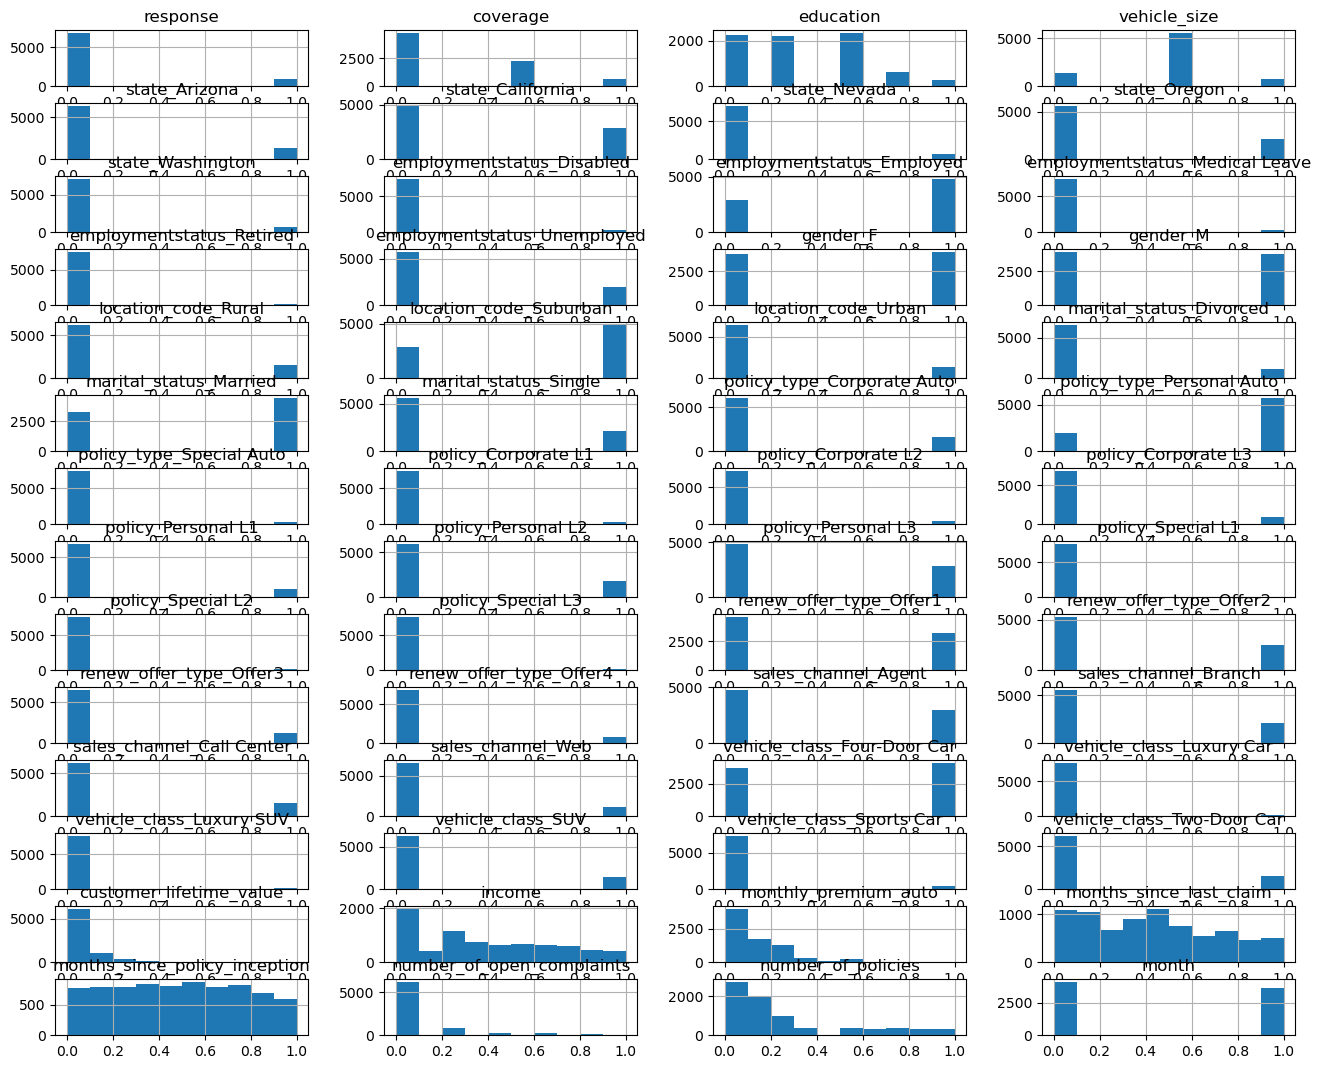

In [20]:
# apply MinMaxScaler to X_train
scaler = MinMaxScaler()

# first fit the PowerTransformer to my X_train data, i.e. calibrating my machine
scaler.fit(X_train) # first, fit is saved in the scaler, no need to assign a variable

# then transform X_train using the fitted transformer, i.e. applying my machine
X_train_scaled = scaler.transform(X_train) # transformed needs to be saved into variable because the values have then be transformed

X_train = pd.DataFrame(X_train_scaled)
X_train.columns = X.columns
X_train.hist(bins=10, figsize=(16,14), layout=(15,4), sharex=False)

array([[<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>],
       [<Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'employmentstatus_Disabled'}>,
        <Axes: title={'center': 'employmentstatus_Employed'}>,
        <Axes: title={'center': 'employmentstatus_Medical Leave'}>],
       [<Axes: title={'center': 'employmentstatus_Retired'}>,
        <Axes: title={'center': 'employmentstatus_Unemployed'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>],
       [<Axes: title={'center': 'location_code_Rural'}>,
        <Axes: title={'center': 'location_code_Suburban'}>,
        <Axes: tit

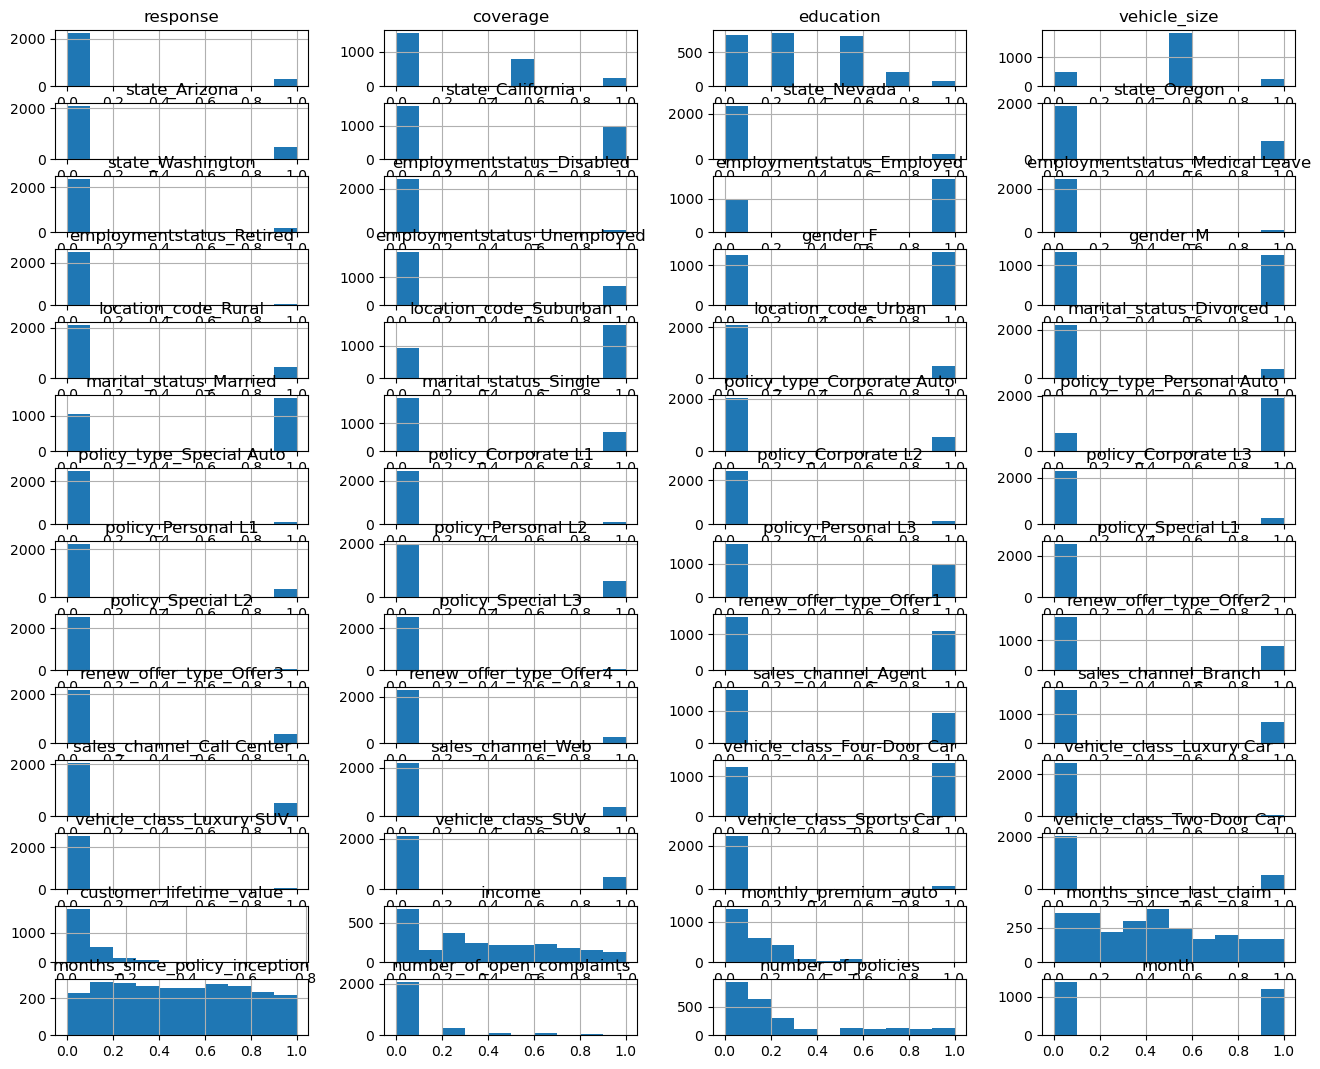

In [21]:
# transform the test data with the same PowerTransformer
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)
X_test.columns = X.columns
X_test.hist(bins=10, figsize=(16,14), layout=(15,4), sharex=False)

In [22]:
# can consider transforming target variables y_train and y_test as well
# and apply pt_X.inverse_transform(y_test/y_pred) later

In [23]:
# X_train.columns = ['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception',
#                   'number_of_open_complaints', 'number_of_policies']

### Apply linear regression
i.e. train the model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# find the line of best fit, i.e. the intercept and slope of our regression line
lm = LinearRegression()
model = lm.fit(X_train,y_train) 

In [26]:
model.coef_

array([[-2.62484407e+01, -2.05638005e+01, -1.63087330e+01,
        -1.52209179e+00,  3.77929175e+14,  3.77929175e+14,
         3.77929175e+14,  3.77929175e+14,  3.77929175e+14,
         1.07192887e+15,  1.07192887e+15,  1.07192887e+15,
         1.07192887e+15,  1.07192887e+15, -7.64639063e+14,
        -7.64639063e+14,  4.32855357e+12,  4.32855357e+12,
         4.32855357e+12, -2.94240637e+14, -2.94240637e+14,
        -2.94240637e+14,  2.87824428e+15, -2.38419810e+14,
         5.82319251e+14, -1.20571746e+15, -1.20571746e+15,
        -1.20571746e+15,  1.91094663e+15,  1.91094663e+15,
         1.91094663e+15,  1.09020757e+15,  1.09020757e+15,
         1.09020757e+15,  1.69497227e+15,  1.69497227e+15,
         1.69497227e+15,  1.69497227e+15,  3.26193462e+14,
         3.26193462e+14,  3.26193462e+14,  3.26193462e+14,
         1.08663600e+15,  1.08663600e+15,  1.08663600e+15,
         1.08663600e+15,  1.08663600e+15,  1.08663600e+15,
        -1.87500000e+00, -1.90000000e+01,  1.27625000e+0

In [27]:
model.intercept_

array([-5.17563546e+15])

### Model Interpretation

In [28]:
X_test

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0.0,0.0,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.046764,0.000000,0.055085,0.057143,0.343434,0.000000,1.000,0.0
1,0.0,0.0,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.011503,0.245107,0.042373,0.200000,0.474747,0.000000,0.000,1.0
2,0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.045133,0.857203,0.033898,0.600000,0.848485,0.000000,0.750,1.0
3,0.0,0.0,0.50,0.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.077315,0.549604,0.177966,0.432831,0.757576,0.076851,0.750,1.0
4,0.0,1.0,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.177485,0.000000,0.440678,0.342857,0.828283,0.200000,0.125,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,1.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.223498,0.927836,0.042373,0.485714,0.151515,0.000000,0.125,0.0
2572,0.0,0.0,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.049032,0.768896,0.050847,0.600000,0.040404,0.000000,1.000,0.0
2573,0.0,0.0,0.50,0.5,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.045649,0.199528,0.055085,0.000000,1.000000,0.200000,0.250,0.0
2574,0.0,1.0,0.00,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.093360,0.962943,0.237288,0.942857,0.818182,0.000000,0.625,0.0


In [29]:
y_test

,total_claim_amount
3173,432.408100
10693,511.200000
7780,325.395532
8135,480.578584
3382,1452.213743
...,...
9202,379.029102
9022,17.375878
6860,355.200000
7863,553.503610


In [30]:
# look at a random customer
random_customer = X_test.sample()
random_customer

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
1960,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.008333,0.375811,0.021186,0.542857,0.141414,0.2,0.0,1.0


In [31]:
model.predict(random_customer)

# can use pt.inverse_transform(model.predict(random_claim)) if we want to transform our target variable as well 
# when setting up the regression model

array([[365.]])

In [32]:
# Create y_pred
y_pred = model.predict(X_test) 
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_pred']
y_pred

# if we transformed y during modelling, we can inverse transform y_pred
# scaler.inverse_transform(y_pred)

,y_pred
0,481.0
1,383.0
2,224.0
3,384.0
4,1006.0
...,...
2571,355.0
2572,40.0
2573,400.0
2574,449.0


In [33]:
y_test = y_test.reset_index(drop=True)
y_test.columns = ['y_test']
y_test

,y_test
0,432.408100
1,511.200000
2,325.395532
3,480.578584
4,1452.213743
...,...
2571,379.029102
2572,17.375878
2573,355.200000
2574,553.503610


In [34]:
# prepare residuals df of test data by joining y_test and y_pred 
residuals_test = pd.concat([y_test,y_pred],axis=1)
residuals_test 

,y_test,y_pred
0,432.408100,481.0
1,511.200000,383.0
2,325.395532,224.0
3,480.578584,384.0
4,1452.213743,1006.0
...,...,...
2571,379.029102,355.0
2572,17.375878,40.0
2573,355.200000,400.0
2574,553.503610,449.0


In [35]:
# add column to calculate residuals
residuals_test['residual'] = residuals_test['y_test']-residuals_test['y_pred']
residuals_test

,y_test,y_pred,residual
0,432.408100,481.0,-48.591900
1,511.200000,383.0,128.200000
2,325.395532,224.0,101.395532
3,480.578584,384.0,96.578584
4,1452.213743,1006.0,446.213743
...,...,...,...
2571,379.029102,355.0,24.029102
2572,17.375878,40.0,-22.624122
2573,355.200000,400.0,-44.800000
2574,553.503610,449.0,104.503610


In [36]:
y_train.reset_index(drop=True,inplace=True)
y_train

,total_claim_amount
0,251.429988
1,200.177163
2,285.825083
3,297.600000
4,25.478179
...,...
7721,0.769185
7722,36.980596
7723,347.075948
7724,236.842746


In [37]:
# Create y_pred_train
y_pred_train = model.predict(X_train) 
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['y_pred_train']
y_pred_train

,y_pred_train
0,285.0
1,178.0
2,367.0
3,399.0
4,-37.0
...,...
7721,195.0
7722,194.0
7723,498.0
7724,225.0


In [38]:
# prepare residuals df of train data by joining y_train and y_pred_train
residuals_train = pd.concat([y_train,y_pred_train],axis=1).reset_index(drop=True)
residuals_train.rename(columns={'total_claim_amount': 'y_train'},inplace=True)
residuals_train

,y_train,y_pred_train
0,251.429988,285.0
1,200.177163,178.0
2,285.825083,367.0
3,297.600000,399.0
4,25.478179,-37.0
...,...,...
7721,0.769185,195.0
7722,36.980596,194.0
7723,347.075948,498.0
7724,236.842746,225.0


In [39]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [40]:
# calculating error metrics for test data

me_test = round(residuals_test.residual.mean(),2)
print(f'mean error of test: {me_test}')

mse_test = round(mse(y_test,y_pred),2) # mean squared error
print(f'mean squared error of test: {mse_test}')

mae_test = round(mae(y_test,y_pred),2) # mean absolute error
print(f'mean absolut error of test: {mae_test}')

rmse_test = round(mse(y_test,y_pred,squared=False),2) # root mean squared error
print(f'root mean squared error of test: {rmse_test}')

mean error of test: 1.38
mean squared error of test: 18366.41
mean absolut error of test: 93.15
root mean squared error of test: 135.52


In [41]:
from sklearn.metrics import r2_score

In [42]:
# calculating R2 score for test data

r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.8

In [43]:
# calculating R2 score for train data

r2_train = round(r2_score(y_train,y_pred_train),2)
r2_train

0.76

### Check feature importance

In [44]:
feature_names = list(X_train.columns)
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]
fi_dict = {'name':feature_names,'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)

In [45]:
fi_df = fi_df.sort_values('coeff', ascending=False)
fi_df

,name,coeff
22,policy_type_Corporate Auto,2.878244e+15
28,policy_Personal L1,1.910947e+15
29,policy_Personal L2,1.910947e+15
30,policy_Personal L3,1.910947e+15
35,renew_offer_type_Offer2,1.694972e+15
37,renew_offer_type_Offer4,1.694972e+15
36,renew_offer_type_Offer3,1.694972e+15
34,renew_offer_type_Offer1,1.694972e+15
31,policy_Special L1,1.090208e+15
32,policy_Special L2,1.090208e+15


/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_79761/1094125967.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fi_plot.set_xticklabels(fi_plot.get_xticklabels(), rotation=90)


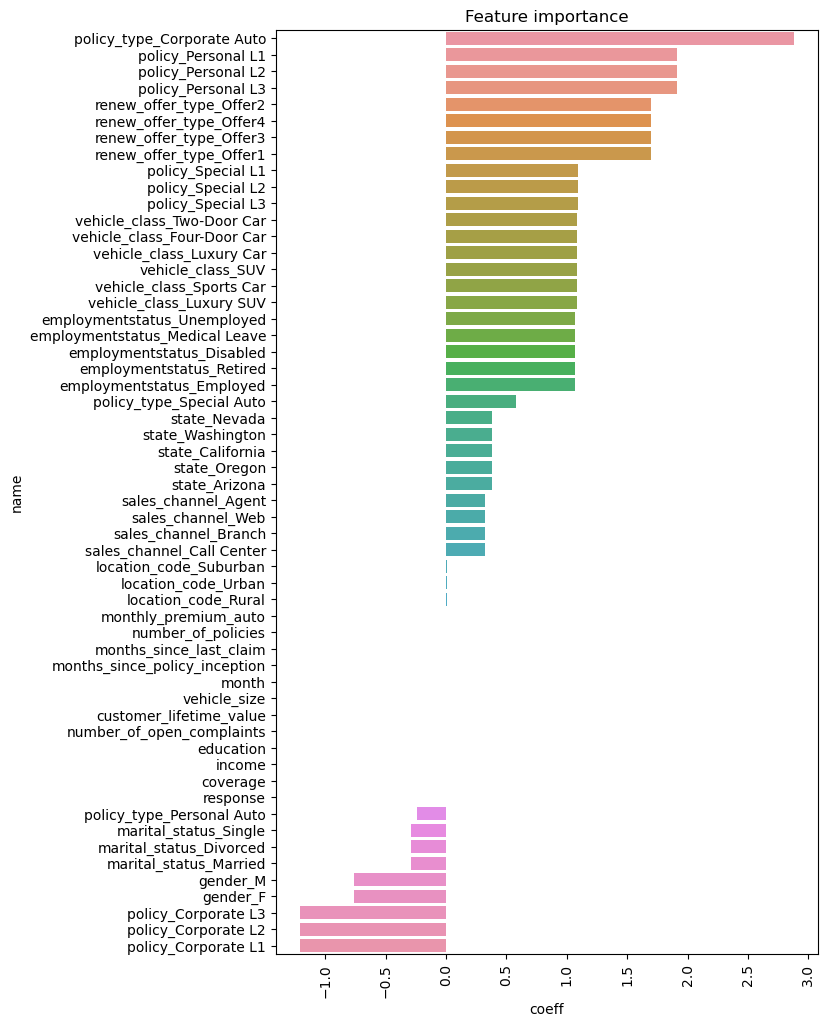

In [46]:
plt.figure(figsize=(7,12))
fi_plot = sns.barplot(y=fi_df['name'],x=fi_df['coeff'])
fi_plot.set_xticklabels(fi_plot.get_xticklabels(), rotation=90)
plt.title('Feature importance')
plt.show()